In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ENO as ENO
import matplotlib.animation as animation

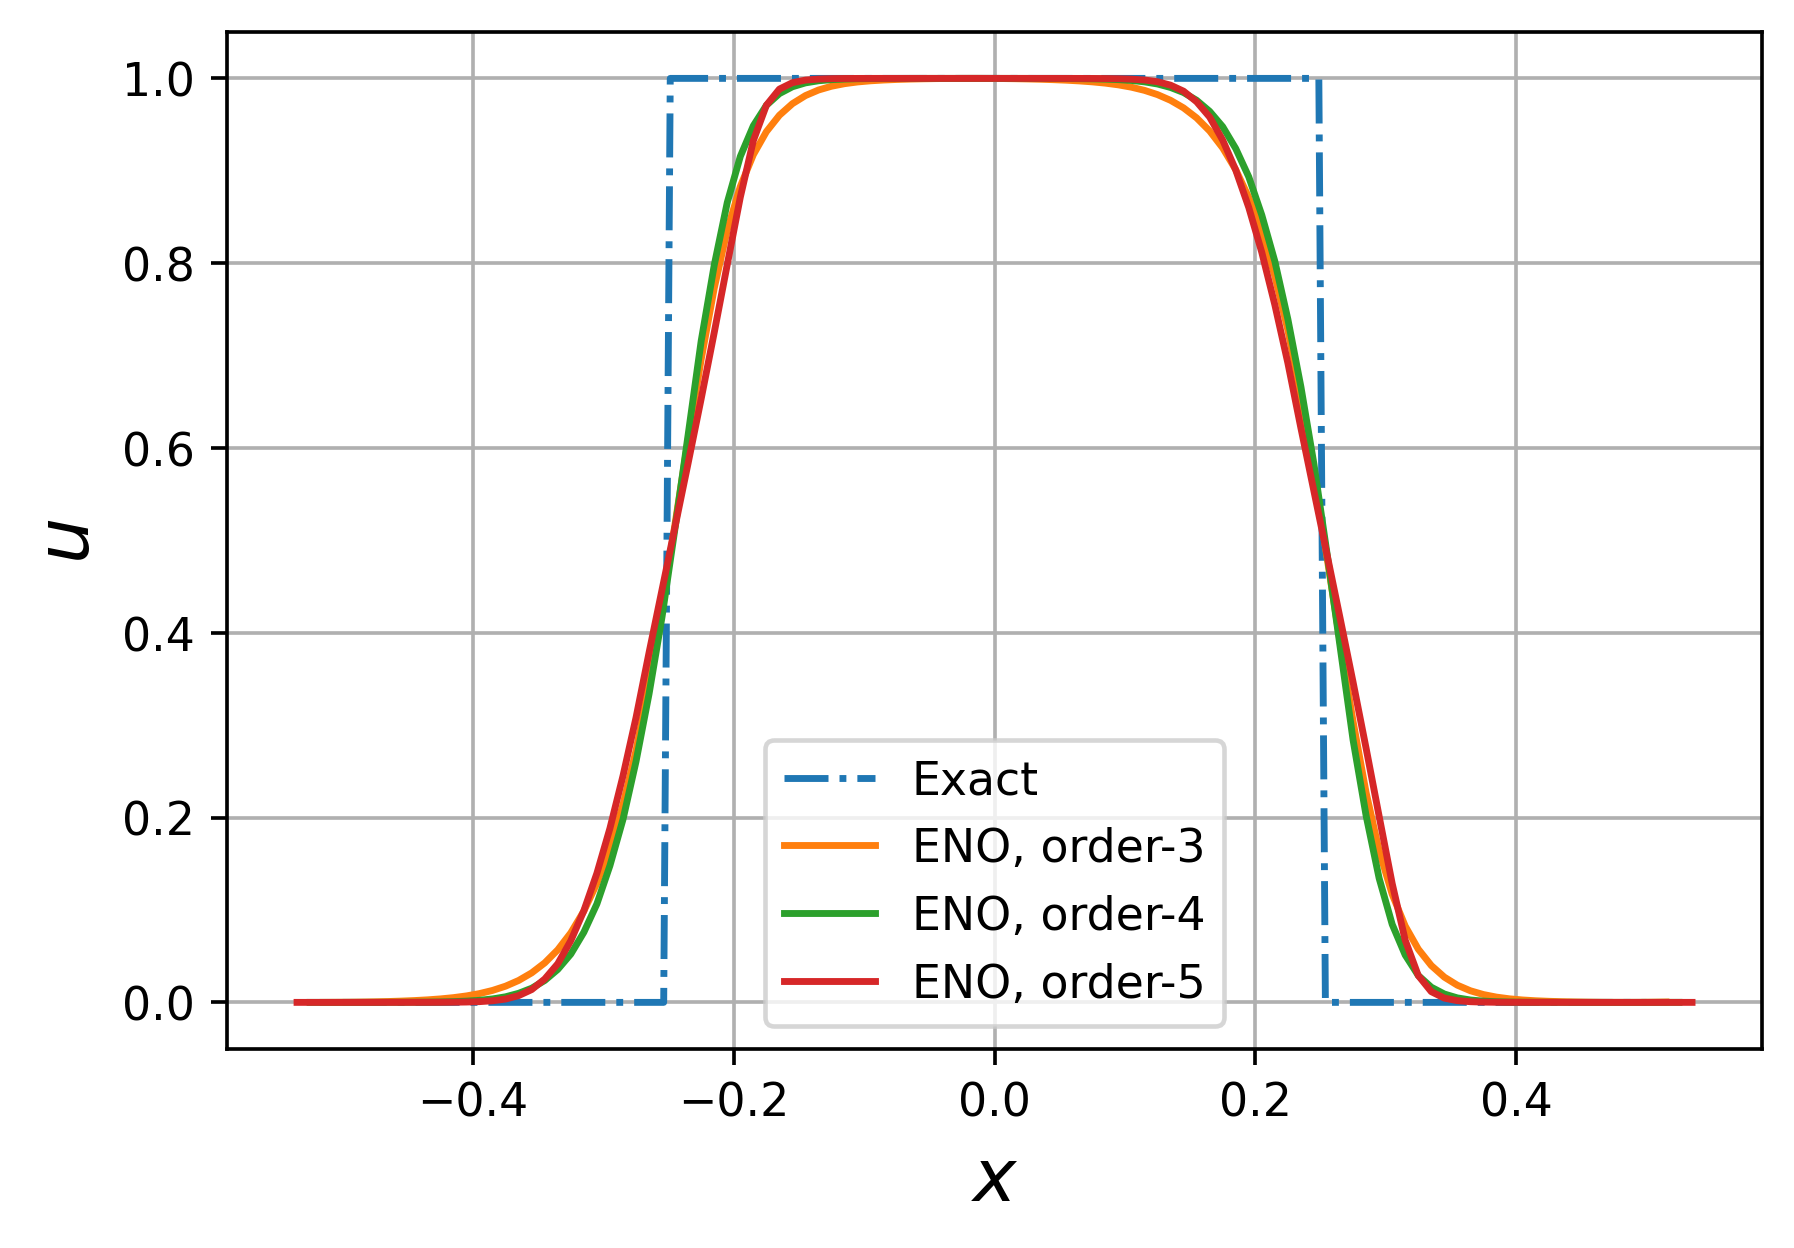

In [10]:
orderList = [3,4,5]
T = 10.0
xx = np.linspace(-0.5, 0.5, 200)
move = T % 1
uExact = (xx < -0.25 + move).astype(np.int32)*0.0 + (xx >= -0.25 + move).astype(np.int32)*\
    (xx <= 0.25 + move).astype(np.int32)*1.0 + (xx > 0.25 + move).astype(np.int32)*0.0 

plt.figure(figsize = (6,4), dpi = 330)
plt.plot(xx, uExact, linestyle = "dashdot", label="Exact")

for order in orderList:
    eno = ENO.ENO_advection(order=order)
    eno.set_initial()
    global_t = 0.0
    while global_t < T:
        dt = eno.Runge_Kutta()
        global_t += dt

    plt.plot(eno.xc, eno.u, label = "ENO, order-{}".format(order))

plt.xlabel("$x$", fontsize = 16)
plt.ylabel("$u$", fontsize = 16)
plt.legend()
plt.grid()
plt.savefig("./Images/Result_{}.png".format(T))
    

In [4]:
def analytical_interval(T: float):
    t = T % 1
    start = -0.25 + t
    if start >=0.5:
        start -= 1.0

    end = 0.25 + t
    if end >=0.5:
        end -= 1.0
    return start, end

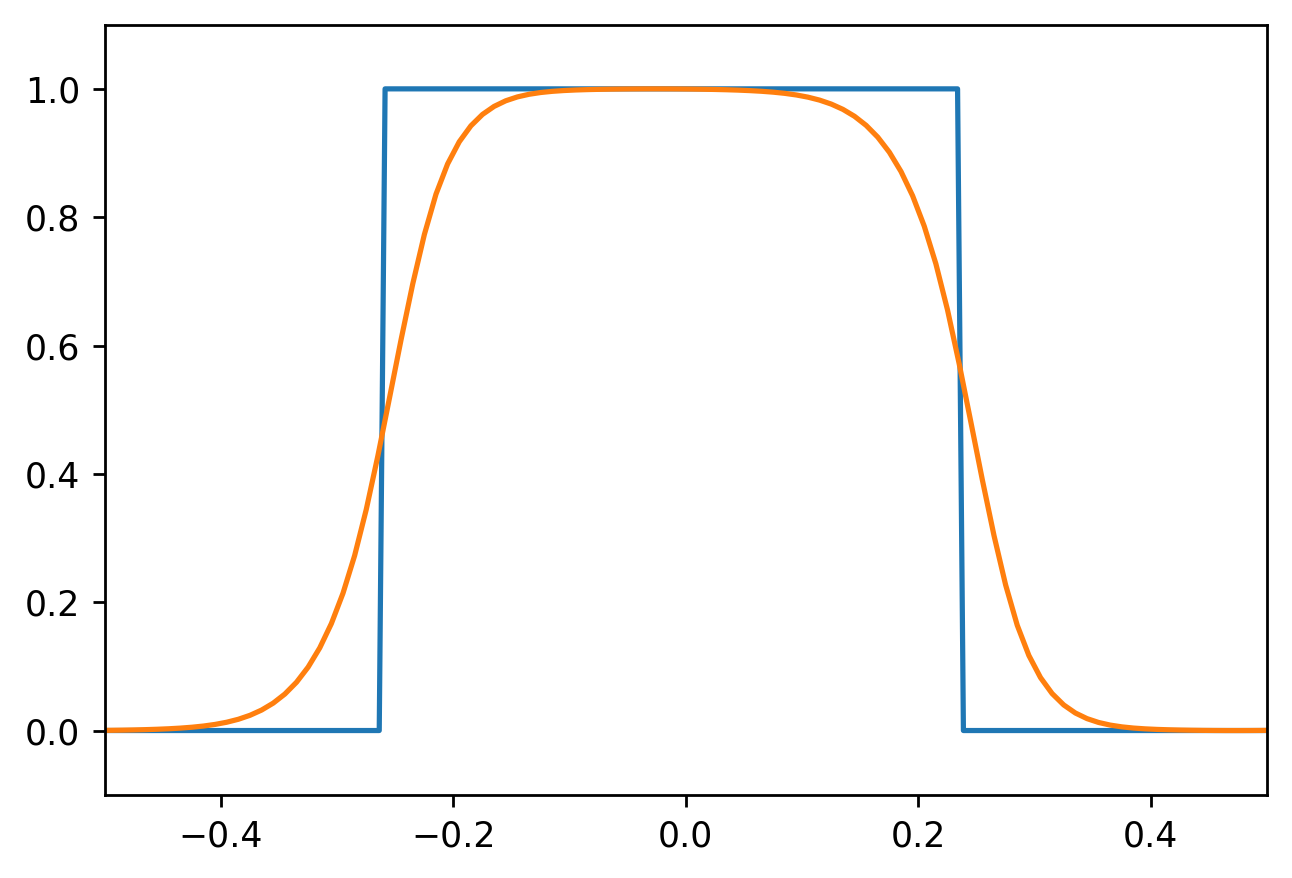

In [22]:
fig = plt.figure(figsize = (6,4), dpi = 250)
axis = plt.axes(xlim=(-0.5,0.5), ylim = (-0.1, 1.1))
lineE, = axis.plot([], [], label = "Exact")
lineN, = axis.plot([], [], label = "ENO, 3rd-order")

eno = ENO.ENO_advection(order=3)
eno.set_initial()
global_t = 0.0
frames = 800
Tend = 10.0
fac = 0.125

def animate(frame_number, global_t = 0.0):
    xx = np.linspace(-0.5, 0.5, 200)
    T = frame_number / float(frames) * Tend
    start, end = analytical_interval(T)

    if start < end:
        uExact = (xx < start).astype(np.int32)*0.0 + (xx >= start).astype(np.int32)*\
            (xx <= end).astype(np.int32)*1.0 + (xx > end).astype(np.int32)*0.0 
    else:
        uExact = (xx <= end).astype(np.int32)*1.0 + (xx > end).astype(np.int32)*\
            (xx < start).astype(np.int32)*0.0 + (xx >= start).astype(np.int32)*1.0 
    
    while eno.global_t < T:
        dt = eno.Runge_Kutta()

    lineE.set_data(xx, uExact)
    lineN.set_data(eno.xc, eno.u)
    return lineE, lineN

anim = animation.FuncAnimation(fig, animate, frames = frames, interval = 2.50, blit = True)
FFwriter = animation.FFMpegWriter()

writer = animation.PillowWriter(fps=25,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
anim.save('ENO-3.gif', writer=writer)